<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/Deep_Learning_Lab/blob/main/CNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.7595 - loss: 0.4989 - val_accuracy: 0.8600 - val_loss: 0.3112
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8701 - loss: 0.3132 - val_accuracy: 0.8850 - val_loss: 0.2693
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9032 - loss: 0.2344 - val_accuracy: 0.9225 - val_loss: 0.1973
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9353 - loss: 0.1761 - val_accuracy: 0.9305 - val_loss: 0.1793
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9454 - loss: 0.1480 - val_accuracy: 0.9280 - val_loss: 0.1758
63/63 - 1s - 13ms/step - accuracy: 0.9290 - loss: 0.1823

Test Accuracy: 0.9290


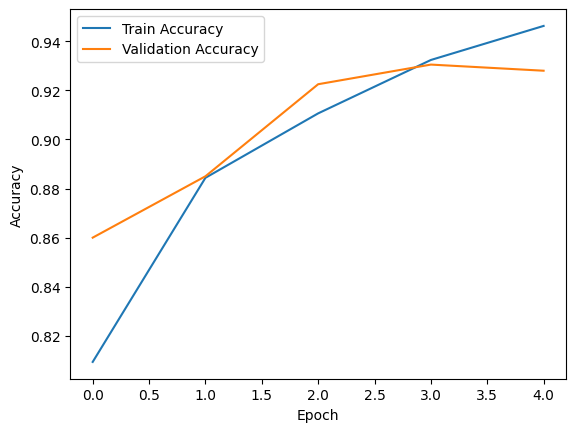

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Select only two classes: Airplane (0) and Automobile (1)
class_indices = [0, 1]
train_mask = np.isin(y_train, class_indices).flatten()
test_mask = np.isin(y_test, class_indices).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to binary (0 for Airplane, 1 for Automobile)
y_train = (y_train == 1).astype(int).flatten()
y_test = (y_test == 1).astype(int).flatten()

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with validation split
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training history (train vs validation accuracy)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.TYAJD3_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


582/582 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.5410 - loss: 0.6947 - val_accuracy: 0.6993 - val_loss: 0.5942
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 720s 1s/step - accuracy: 0.7082 - loss: 0.5669 - val_accuracy: 0.7657 - val_loss: 0.4756
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 678s 1s/step - accuracy: 0.7727 - loss: 0.4767 - val_accuracy: 0.8106 - val_loss: 0.4154
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 655s 1s/step - accuracy: 0.8247 - loss: 0.3963 - val_accuracy: 0.8179 - val_loss: 0.3880
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 692s 1s/step - accuracy: 0.8570 - loss: 0.3348 - val_accuracy: 0.8298 - val_loss: 0.4004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


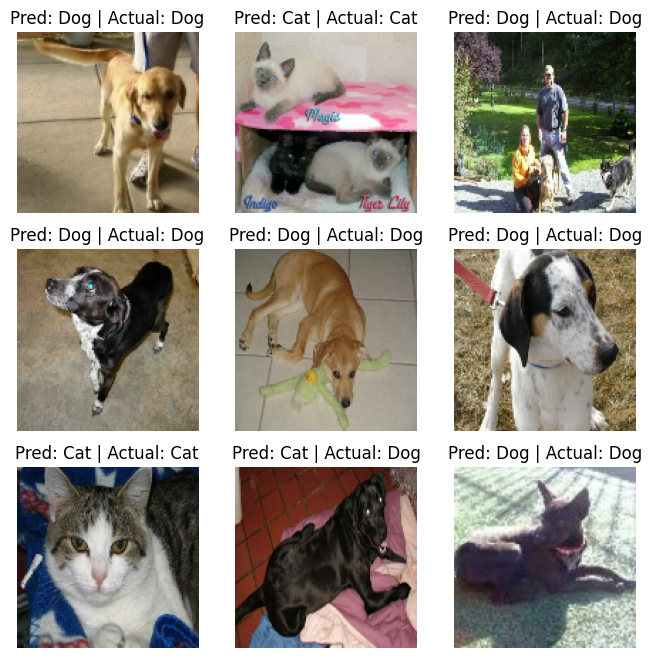

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load and preprocess the dataset
dataset_name = "cats_vs_dogs"
(ds_train, ds_test), ds_info = tfds.load(dataset_name, split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

IMG_SIZE = 128

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize (0 to 1)
    return image, label

ds_train = ds_train.map(format_image).batch(32).shuffle(1000)
ds_test = ds_test.map(format_image).batch(32)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(ds_train, validation_data=ds_test, epochs=5)

# Test and visualize predictions
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    predictions = (predictions > 0.5).astype("int32")

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    axes = axes.flatten()

    for img, pred, label, ax in zip(images, predictions, labels, axes):
        ax.imshow(img.numpy())
        ax.set_title(f"Pred: {'Dog' if pred == 1 else 'Cat'} | Actual: {'Dog' if label == 1 else 'Cat'}")
        ax.axis('off')

plt.show()

# Save the model
model.save("cat_vs_dog_cnn.h5")
